Import data and display

In [ ]:
import pandas as pd

# Load the dataset
file_path = 'mtg.csv'
df = pd.read_csv(file_path)

# Display the first few rows to understand the structure
df.head()


,Unnamed: 0,cardName,cardCmc,cardType,creatureType,powTough,set,setNum,rarity,language,cardImage,price,Pack price
0,0,Angel of Serenity,{4} {W} {W} {W},Creature,Angel,05-Jun,Return to Ravnica (RTR),#1,Mythic Rare,English,https://c1.scryfall.com/file/scryfall-cards/la...,1.81,6
1,1,Armory Guard,{3} {W},Creature,Giant Soldier,02-May,Return to Ravnica (RTR),#2,Common,English,https://c1.scryfall.com/file/scryfall-cards/la...,0.02,6
2,2,Arrest,{2} {W},Enchantment,NaN,NaN,Return to Ravnica (RTR),#3,Uncommon,English,https://c1.scryfall.com/file/scryfall-cards/la...,0.09,6
3,3,Avenging Arrow,{2} {W},Instant,NaN,NaN,Return to Ravnica (RTR),#4,Common,English,https://c1.scryfall.com/file/scryfall-cards/la...,0.06,6
4,4,Azorius Arrester,{1} {W},Creature,Human Soldier,02-Jan,Return to Ravnica (RTR),#5,Common,English,https://c1.scryfall.com/file/scryfall-cards/la...,0.10,6


Pack opener

In [ ]:
import pandas as pd
import numpy as np

# Load the dataset and ensure there are no extra spaces in column values
df = pd.read_csv('mtg.csv')
df['rarity'] = df['rarity'].str.strip()

def open_pack(set_name):
    # Filter the dataset to only include cards from the chosen set
    set_cards = df[df['set'] == set_name]

    # Check if the filtering worked correctly
    if set_cards.empty:
        print(f"No cards found for set '{set_name}'. Please check the set name.")
        return

    # Display the first few rows to verify the data
    print("Filtered Data Preview:")
    print(set_cards.head())

    # Check and print unique rarity values in the filtered set
    print("Unique rarities in the filtered set:", set_cards['rarity'].unique())

    # Get the pack price
    pack_price = set_cards['Pack price'].iloc[0]

    # Draw commons
    commons = set_cards[set_cards['rarity'] == 'Common']
    if commons.empty:
        print("No commons found in this set.")
        return
    commons = commons.sample(6)

    # Draw uncommons
    uncommons = set_cards[set_cards['rarity'] == 'Uncommon']
    if uncommons.empty:
        print("No uncommons found in this set.")
        return
    uncommons = uncommons.sample(4)

    # Draw rare
    rare = set_cards[set_cards['rarity'] == 'Rare']
    if rare.empty:
        print("No rares found in this set.")
        return
    rare = rare.sample(1)

    # Draw final card (12% chance Mythic Rare, 88% Uncommon)
    final_card = set_cards[set_cards['rarity'].isin(['Mythic Rare', 'Uncommon'])]
    if final_card.empty:
        print("No mythics or uncommons found in this set.")
        return

    # Calculate weights for sampling
    weights = final_card['rarity'].apply(lambda r: 0.12 if r == 'Mythic Rare' else 0.88)

    # Sample the final card
    final_card = final_card.sample(1, weights=weights)

    # Combine all drawn cards
    pack_cards = pd.concat([commons, uncommons, rare, final_card])

    # Calculate the total value of the pack
    total_value = pack_cards['price'].sum()

    # Display the results
    print(f"Pack from set: {set_name}")
    print(f"Pack Price: ${pack_price:.2f}")
    print("Cards in pack:")
    print(pack_cards[['cardName', 'price']])
    print(f"Total pack value: ${total_value:.2f}")
    print(f"Profit/Loss: ${total_value - pack_price:.2f}")

# Example usage
open_pack('Return to Ravnica (RTR)')


Filtered Data Preview:
   Unnamed: 0           cardName           cardCmc      cardType  \
0           0  Angel of Serenity  {4} {W} {W} {W}      Creature    
1           1       Armory Guard          {3} {W}      Creature    
2           2             Arrest          {2} {W}   Enchantment    
3           3     Avenging Arrow          {2} {W}        Instant   
4           4   Azorius Arrester          {1} {W}      Creature    

     creatureType powTough                      set setNum       rarity  \
0           Angel   05-Jun  Return to Ravnica (RTR)    #1   Mythic Rare   
1   Giant Soldier   02-May  Return to Ravnica (RTR)    #2        Common   
2             NaN      NaN  Return to Ravnica (RTR)    #3      Uncommon   
3             NaN      NaN  Return to Ravnica (RTR)    #4        Common   
4   Human Soldier   02-Jan  Return to Ravnica (RTR)    #5        Common   

   language                                          cardImage  price  \
0   English  https://c1.scryfall.com/file/sc

Opening any amount of number of packs for a given set

In [ ]:
def simulate_packs(set_name, num_simulations=1000):
    profits_losses = []
    pack_values = []

    for _ in range(num_simulations):
        # Filter the dataset to only include cards from the chosen set
        set_cards = df[df['set'] == set_name]
        if set_cards.empty:
            print(f"No cards found for set '{set_name}'. Please check the set name.")
            return

        # Get the pack price
        pack_price = set_cards['Pack price'].iloc[0]

        # Draw commons
        commons = set_cards[set_cards['rarity'] == 'Common'].sample(6)

        # Draw uncommons
        uncommons = set_cards[set_cards['rarity'] == 'Uncommon'].sample(4)

        # Draw rare
        rare = set_cards[set_cards['rarity'] == 'Rare'].sample(1)

        # Draw final card (12% chance Mythic Rare, 88% Uncommon)
        final_card = set_cards[set_cards['rarity'].isin(['Mythic Rare', 'Uncommon'])]
        weights = final_card['rarity'].apply(lambda r: 0.12 if r == 'Mythic Rare' else 0.88)
        final_card = final_card.sample(1, weights=weights)

        # Combine all drawn cards
        pack_cards = pd.concat([commons, uncommons, rare, final_card])

        # Calculate the total value of the pack
        total_value = pack_cards['price'].sum()
        profit_loss = total_value - pack_price

        # Store results
        profits_losses.append(profit_loss)
        pack_values.append(total_value)

    # Calculate statistics
    avg_profit_loss = np.mean(profits_losses)
    avg_pack_value = np.mean(pack_values)
    positive_packs = sum(1 for x in profits_losses if x > 0)
    negative_packs = sum(1 for x in profits_losses if x <= 0)

    # Display the results
    print(f"Simulated {num_simulations} pack openings for set: {set_name}")
    print(f"Average Profit/Loss per pack: ${avg_profit_loss:.2f}")
    print(f"Average pack value: ${avg_pack_value:.2f}")
    print(f"Number of packs with positive value: {positive_packs}")
    print(f"Number of packs with negative or break-even value: {negative_packs}")

# Example usage
simulate_packs('Return to Ravnica (RTR)', num_simulations=1000)


Simulated 1000 pack openings for set: Return to Ravnica (RTR)
Average Profit/Loss per pack: $-0.99
Average pack value: $5.01
Number of packs with positive value: 268
Number of packs with negative or break-even value: 732


Simulating packs from every set in one go

In [ ]:
def simulate_all_sets(num_simulations=1000):
    # Get all unique sets from the dataset
    unique_sets = df['set'].unique()

    # Initialize a list to store results
    all_results = []

    # Loop through each set and simulate
    for set_name in unique_sets:
        print(f"Simulating for set: {set_name}")
        profits_losses = []
        pack_values = []

        for _ in range(num_simulations):
            set_cards = df[df['set'] == set_name]
            if set_cards.empty:
                continue

            pack_price = set_cards['Pack price'].iloc[0]
            commons = set_cards[set_cards['rarity'] == 'Common'].sample(6)
            uncommons = set_cards[set_cards['rarity'] == 'Uncommon'].sample(4)
            rare = set_cards[set_cards['rarity'] == 'Rare'].sample(1)
            final_card = set_cards[set_cards['rarity'].isin(['Mythic Rare', 'Uncommon'])]
            weights = final_card['rarity'].apply(lambda r: 0.12 if r == 'Mythic Rare' else 0.88)
            final_card = final_card.sample(1, weights=weights)
            pack_cards = pd.concat([commons, uncommons, rare, final_card])
            total_value = pack_cards['price'].sum()
            profit_loss = total_value - pack_price

            profits_losses.append(profit_loss)
            pack_values.append(total_value)

        # Calculate statistics for this set
        avg_profit_loss = np.mean(profits_losses)
        avg_pack_value = np.mean(pack_values)
        positive_packs = sum(1 for x in profits_losses if x > 0)
        negative_packs = sum(1 for x in profits_losses if x <= 0)

        # Store the results for this set
        all_results.append({
            'set_name': set_name,
            'avg_profit_loss': avg_profit_loss,
            'avg_pack_value': avg_pack_value,
            'positive_packs': positive_packs,
            'negative_packs': negative_packs,
            'total_simulations': num_simulations
        })

    return all_results


In [ ]:
# Run the simulation for all sets
results = simulate_all_sets(num_simulations=20)


Simulating for set: Return to Ravnica (RTR)
Simulating for set: Gatecrash (GTC)
Simulating for set: Dragon's Maze (DGM)
Simulating for set: Theros (THS)
Simulating for set: Born of the Gods (BNG)
Simulating for set: Journey into Nyx (JOU)
Simulating for set: Khans of Tarkir (KTK)
Simulating for set: Fate Reforged (FRF)
Simulating for set: Dragons of Tarkir (DTK)
Simulating for set: Battle for Zendikar (BFZ)
Simulating for set: Oath of the Gatewatch (OGW)
Simulating for set: Shadows over Innistrad (SOI)
Simulating for set: Eldritch Moon (EMN)
Simulating for set: Kaladesh (KLD)
Simulating for set: Aether Revolt (AER)
Simulating for set: Amonkhet (AKH)
Simulating for set: Hour of Devastation (HOU)
Simulating for set: Ixalan (XLN)
Simulating for set: Rivals of Ixalan (RIX)
Simulating for set: Dominaria (DOM)
Simulating for set: Guilds of Ravnica (GRN)
Simulating for set: Ravnica Allegiance (RNA)
Simulating for set: War of the Spark (WAR)
Simulating for set: Throne of Eldraine (ELD)
Simulat

In [ ]:
# Convert the results to a DataFrame for analysis
results_df = pd.DataFrame(results)

# Show the top sets by average profit/loss
print("Top 5 sets by average profit/loss:")
print(results_df.sort_values(by='avg_profit_loss', ascending=False).head())

# Show the sets with the highest average pack value
print("\nTop 5 sets by average pack value:")
print(results_df.sort_values(by='avg_pack_value', ascending=False).head())

# Display the results for all sets
print("\nResults for all sets:")
print(results_df)


Top 5 sets by average profit/loss:
                           set_name  avg_profit_loss  avg_pack_value  \
21         Ravnica Allegiance (RNA)           0.1245          5.1245   
25  Ikoria: Lair of Behemoths (IKO)           0.1105          5.1105   
17                     Ixalan (XLN)          -0.8145          5.1855   
23         Throne of Eldraine (ELD)          -0.9820          4.0180   
19                  Dominaria (DOM)          -1.1770          4.8230   

    positive_packs  negative_packs  total_simulations  
21               6              14                 20  
25               8              12                 20  
17               5              15                 20  
23               1              19                 20  
19               7              13                 20  

Top 5 sets by average pack value:
                           set_name  avg_profit_loss  avg_pack_value  \
15                   Amonkhet (AKH)          -1.5875          7.4125   
18           Riva

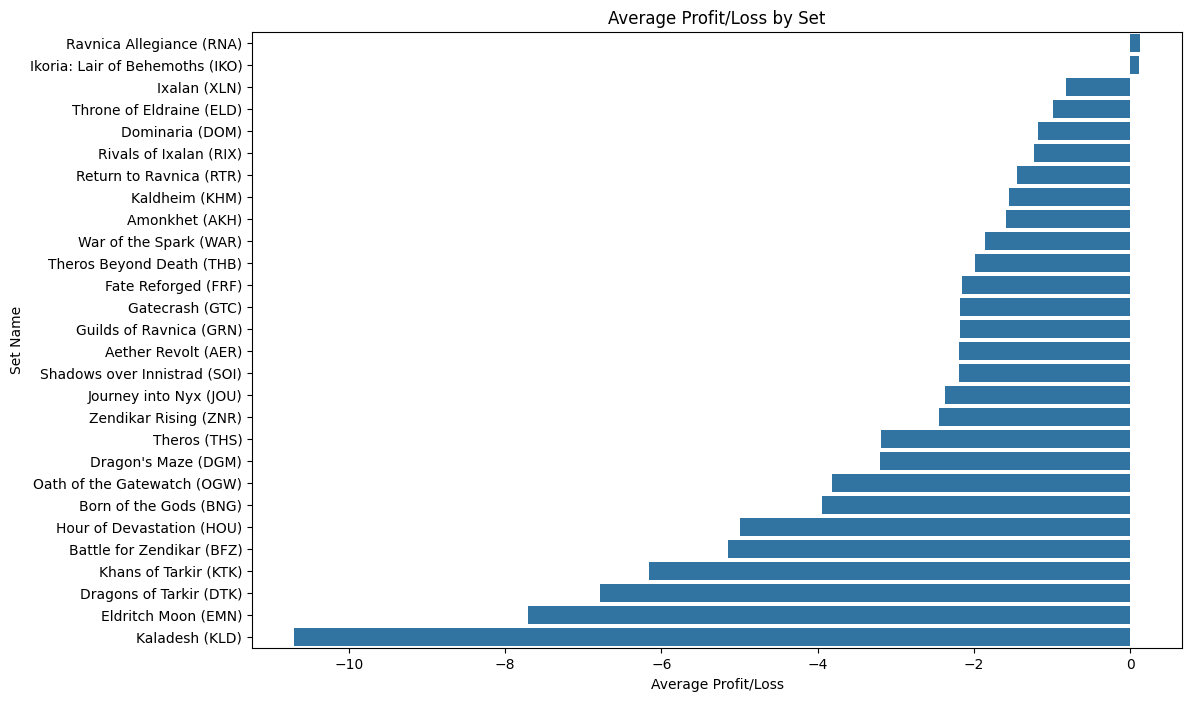

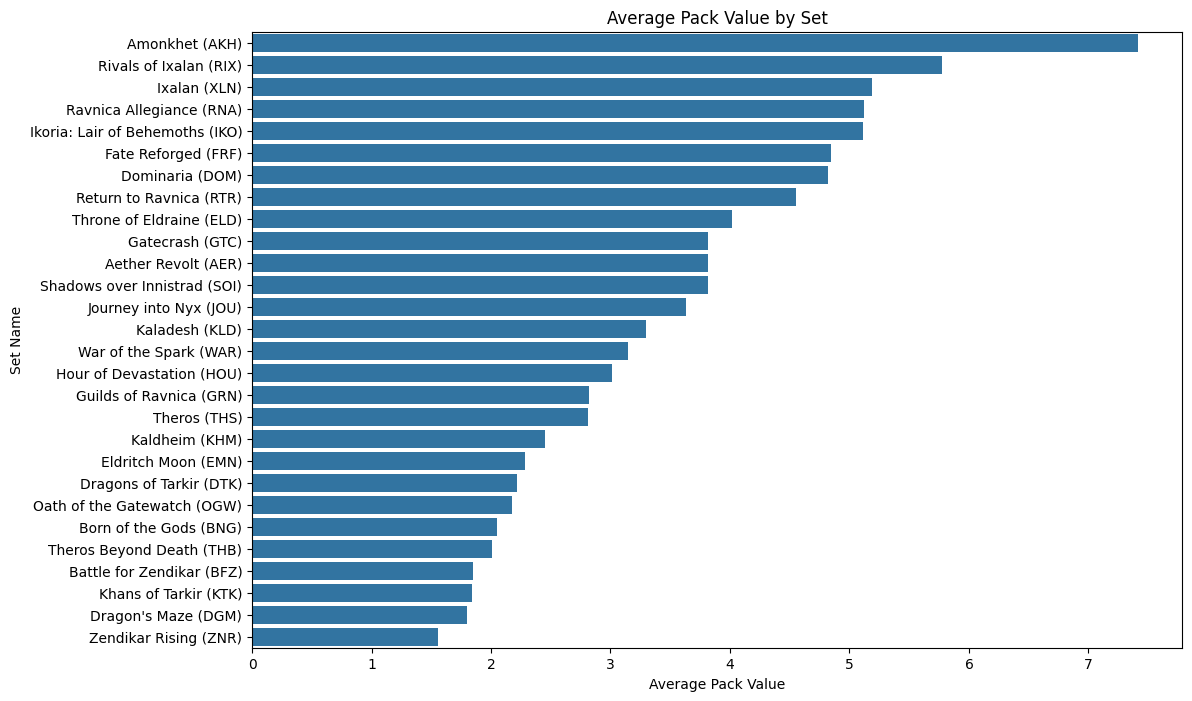

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot average profit/loss for each set
plt.figure(figsize=(12, 8))
sns.barplot(x='avg_profit_loss', y='set_name', data=results_df.sort_values(by='avg_profit_loss', ascending=False))
plt.title('Average Profit/Loss by Set')
plt.xlabel('Average Profit/Loss')
plt.ylabel('Set Name')
plt.show()

# Plot average pack value for each set
plt.figure(figsize=(12, 8))
sns.barplot(x='avg_pack_value', y='set_name', data=results_df.sort_values(by='avg_pack_value', ascending=False))
plt.title('Average Pack Value by Set')
plt.xlabel('Average Pack Value')
plt.ylabel('Set Name')
plt.show()


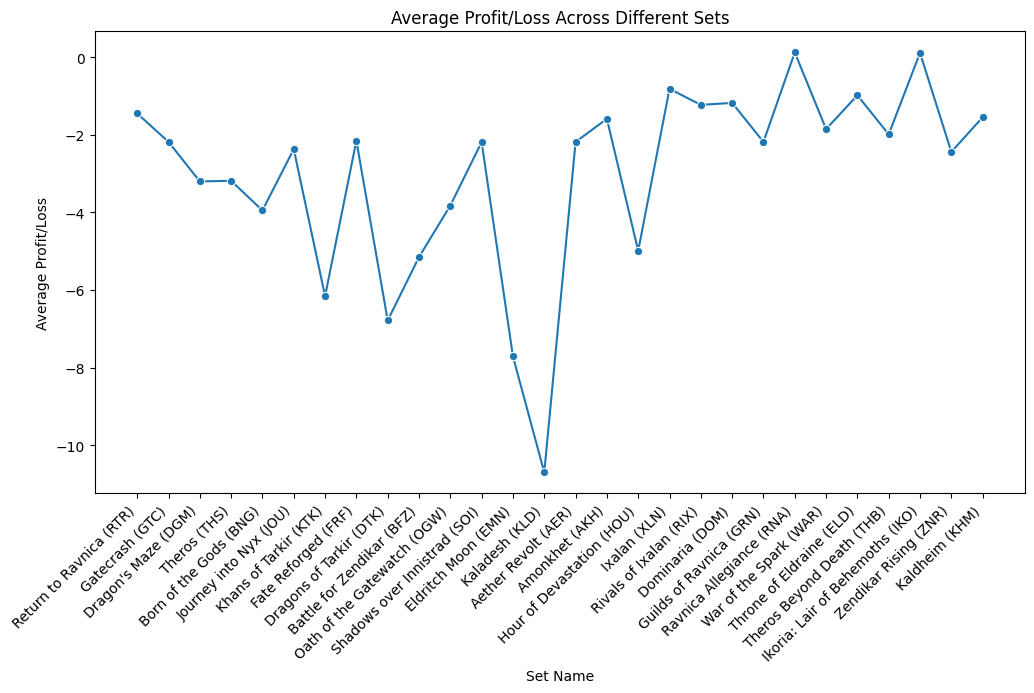

In [ ]:
# Line plot for average profit/loss across sets
plt.figure(figsize=(12, 6))
sns.lineplot(x='set_name', y='avg_profit_loss', data=results_df, marker='o')
plt.title('Average Profit/Loss Across Different Sets')
plt.xlabel('Set Name')
plt.ylabel('Average Profit/Loss')
plt.xticks(rotation=45, ha='right')
plt.show()
